In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python


# Imports:

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # creating graphs
import seaborn as sns # data visualization

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.neural_network import MLPClassifier

# analyzing models
from sklearn import metrics
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from math import exp # for logistic regression

# feature selection
from sklearn.feature_selection import SelectKBest, chi2

%matplotlib inline


import os
print(os.getcwd())
for dirname, _, filenames in os.walk('/Users/kwonsebin/Documents/경희대/3-1/데마/Term Project'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/Users/kwonsebin/Documents/경희대/3-1
/Users/kwonsebin/Documents/경희대/3-1/데마/Term Project/.DS_Store
/Users/kwonsebin/Documents/경희대/3-1/데마/Term Project/diabetes_012_health_indicators_BRFSS2015.csv
/Users/kwonsebin/Documents/경희대/3-1/데마/Term Project/diabetes_binary_health_indicators_BRFSS2015.csv
/Users/kwonsebin/Documents/경희대/3-1/데마/Term Project/diabetes_binary_5050split_health_indicators_BRFSS2015.csv
/Users/kwonsebin/Documents/경희대/3-1/데마/Term Project/dataMiningProject/.git/config
/Users/kwonsebin/Documents/경희대/3-1/데마/Term Project/dataMiningProject/.git/HEAD
/Users/kwonsebin/Documents/경희대/3-1/데마/Term Project/dataMiningProject/.git/description
/Users/kwonsebin/Documents/경희대/3-1/데마/Term Project/dataMiningProject/.git/info/exclude
/Users/kwonsebin/Documents/경희대/3-1/데마/Term Project/dataMiningProject/.git/hooks/commit-msg.sample
/Users/kwonsebin/Documents/경희대/3-1/데마/Term Project/dataMiningProject/.git/hooks/pre-rebase.sample
/Users/kwonsebin/Documents/경희대/3-1/데마/Term Project/dataMiningProject/.g

### Reading and Reviewing the Data

In [23]:
train = pd.read_csv('/Users/kwonsebin/Documents/경희대/3-1/데마/Term Project/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [25]:
# Confusion matrix for visualizing prediction accuracy

def plot_cm(pred, test, title=''):
    
    cm = metrics.confusion_matrix(test, pred, normalize='true')

    text = np.array([['True Negative','False Positive'],['False Negative','True Positive']])
    labels = np.array([f'{i}\n{j:.2%}' for i, j in zip(text.flatten(), cm.flatten())]).reshape(2, 2)

    ax = sns.heatmap(cm, annot=labels, xticklabels=['Negative', 'Positive'],
                     yticklabels=['Negative', 'Positive'], cmap='Greens', cbar=False,
                     vmin=0, vmax=1, linewidth=1.2, linecolor='k', fmt='')
    ax.set(xlabel='Predicted', ylabel='Actual', title=title)
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    ax.plot()
    
    return


# def describe_prediction(pred, test=Y_test):
def describe_prediction(pred, test):
    print('TOTALS:')
    print(f'Predicted Positives:\t {len(pred[pred == 1]):,}')
    print(f'Predicted Negatives:\t {len(pred[pred == 0]):,}')
    print(f'Actual Positives:\t {len(test[test == 1]):,}')
    print(f'Actual Negatives:\t {len(test[test == 0]):,}')
    
    print()
    
    print('MODEL EVALUATION:')
    print(f'Accuracy:\t {metrics.accuracy_score(test, pred): .2%}')
    print(f'Precision:\t {metrics.precision_score(test, pred): .2%}')
    print(f'Sensitivity:\t {metrics.recall_score(test, pred): .2%}')
    print(f'Specificity:\t {metrics.recall_score(test, pred, pos_label=0): .2%}')
    print(f'F-score:\t {metrics.f1_score(test, pred): .2%}')
    
    print()
    
    return


def plot_feature_importance(importances, title=''):
    sns.barplot(x=importances, y=importances.index)
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title(title)
    return


In [26]:
from sklearn.model_selection import train_test_split


X = train.iloc[:, 1:] # pick out some for validation
y = train.Diabetes_binary
X, X_test, y, y_test = train_test_split(X,y, test_size = 0.2, random_state = 40)

# # lr = LogisticRegression(max_iter=1000).fit(X, y)
dt = DecisionTreeClassifier()
dt = dt.fit(X, y)
dt_pred = dt.predict(X_test)
describe_prediction(dt_pred, y_test)

# # rf = RandomForestClassifier().fit(X, y)
# # xgb = XGBClassifier().fit(X, y)



# dt_pred = dt.predict(X_test)
# describe_prediction(dt_pred, Y_test)
# # plt.figure(figsize=(5, 5))
# # plot_cm(dt_pred, title='Decision Tree')

# dt_train = dt.predict(X)
# describe_prediction(dt_train, y)
# # plt.figure(figsize=(5, 5))
# # plot_cm(dt_pred, title='Decision Tree')



TOTALS:
Predicted Positives:	 6,960
Predicted Negatives:	 7,179
Actual Positives:	 7,172
Actual Negatives:	 6,967

MODEL EVALUATION:
Accuracy:	  65.49%
Precision:	  66.47%
Sensitivity:	  64.50%
Specificity:	  66.50%
F-score:	  65.47%



In [27]:
from sklearn.feature_selection import SelectKBest, chi2
X, y = train.iloc[:, 1:], train.Diabetes_binary

from sklearn.metrics import accuracy_score
max_depth = [[]]
acc_gini = [[]]
acc_entropy = [[]]


for j in range(1, 21): #21
    sel_Feat = SelectKBest(chi2, k = j).fit(X, y)
    sel_Bool = sel_Feat.get_support()

    X_sel = X[X.columns[sel_Bool]]
    X_sel.head()
    X_train, X_test, Y_train, Y_test = train_test_split(X_sel, y, test_size = 0.2, random_state = 21)
    max_depth.append([])
    acc_gini.append([])
    acc_entropy.append([])
    
    for i in range(1,10): #30
        dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
        dtree.fit(X_train, Y_train)
        pred = dtree.predict(X_test)
        acc_gini[j].append(metrics.recall_score(Y_test, pred))
     ####
        dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
        dtree.fit(X_train, Y_train)
        pred = dtree.predict(X_test)
        acc_entropy[j].append(metrics.recall_score(Y_test, pred))
     ####
        max_depth[j].append(i+j)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
    'acc_entropy':pd.Series(acc_entropy),
    'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters

(acc_gini)

[[],
 [0.399039819260096,
  0.4943518780005648,
  0.43631742445636823,
  0.43631742445636823,
  0.43631742445636823,
  0.43631742445636823,
  0.43631742445636823,
  0.43631742445636823,
  0.43631742445636823],
 [0.7055916407794408,
  0.785230160971477,
  0.5302174526969783,
  0.616210110138379,
  0.6544761366845524,
  0.667890426433211,
  0.664360350183564,
  0.6479807963852019,
  0.6475571872352442],
 [0.7055916407794408,
  0.785230160971477,
  0.5302174526969783,
  0.616210110138379,
  0.6544761366845524,
  0.6413442530358656,
  0.6404970347359503,
  0.6534877153346512,
  0.6433210957356679],
 [0.7055916407794408,
  0.6176221406382378,
  0.7223948037277605,
  0.691330132730867,
  0.7423044337757696,
  0.7281841287771816,
  0.7153346512284665,
  0.7283253318271675,
  0.7239480372776051],
 [0.791019486020898,
  0.7408924032759108,
  0.8597853713640214,
  0.68780005648122,
  0.8208133295679186,
  0.7753459474724654,
  0.78410053657159,
  0.7674385766732561,
  0.7680033888731996],
 [0.74

In [11]:
for i in range(1,21):
    print(max(acc_gini[i]))

0.4943518780005648
0.785230160971477
0.785230160971477
0.7423044337757696
0.8597853713640214
0.8411465687658853
0.8411465687658853
0.8411465687658853
0.8411465687658853
0.8411465687658853
0.8411465687658853
0.8411465687658853
0.8411465687658853
0.8411465687658853
0.8411465687658853
0.8411465687658853
0.8411465687658853
0.8411465687658853
0.8411465687658853
0.8411465687658853


In [16]:
for i in range(1,21):
    print(max(acc_gini[i]), acc_gini[i].index(max(acc_gini[i]))+1)

0.4943518780005648 2
0.785230160971477 2
0.785230160971477 2
0.7423044337757696 5
0.8597853713640214 3
0.8411465687658853 3
0.8411465687658853 3
0.8411465687658853 3
0.8411465687658853 3
0.8411465687658853 3
0.8411465687658853 3
0.8411465687658853 3
0.8411465687658853 3
0.8411465687658853 3
0.8411465687658853 3
0.8411465687658853 3
0.8411465687658853 3
0.8411465687658853 3
0.8411465687658853 3
0.8411465687658853 3


0.8411465687658853
0.8515955944648405


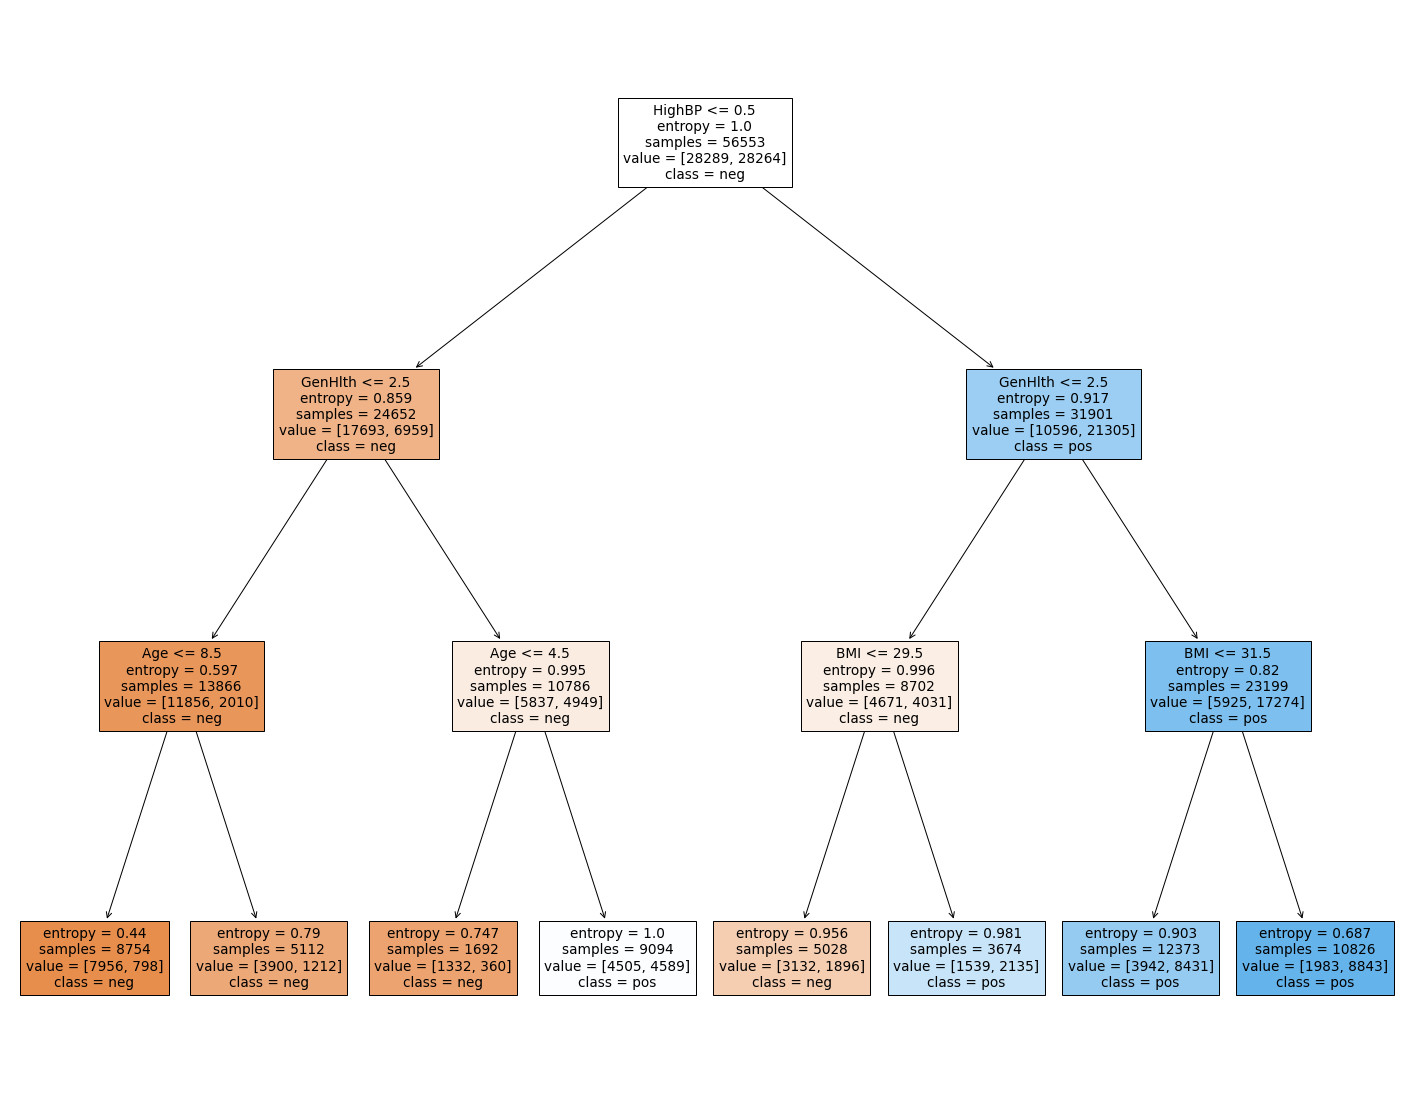

In [18]:
j , i = 7,3
sel_Feat = SelectKBest(chi2, k = j).fit(X, y)
sel_Bool = sel_Feat.get_support()

X_sel = X[X.columns[sel_Bool]]

X_train, X_test, Y_train, Y_test = train_test_split(X_sel, y, test_size = 0.2, random_state = 21)
max_depth.append([])
acc_gini.append([])
acc_entropy.append([])
    

dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
dtree.fit(X_train, Y_train)
pred = dtree.predict(X_test)
print(metrics.recall_score(Y_test, pred))
####
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
dtree.fit(X_train, Y_train)
pred = dtree.predict(X_test)
print(metrics.recall_score(Y_test, pred))
####
sel_Bool = sel_Feat.get_support()

# X_sel = X[X.columns[sel_Bool]]


classes = ['neg', 'pos']

from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, feature_names=X_sel.columns, class_names=classes, filled=True)



In [16]:
# data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [17]:
# data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [18]:
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [19]:
duplicates = data[data.duplicated()]
print("Duplicate Rows:", len(duplicates))
duplicates.head()

Duplicate Rows: 23899


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,2.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
2700,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
3160,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
3332,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0


# Data Visualization

## Variable Descriptions:
(Obtained from BRFSS 2015 Codebook)

#### Diabetes_012
0 = no diabetes.   1 = prediabetes.  2 = diabetes.

#### HighBP
0 = no high BP 1 = high BP

#### HighChol
0 = no high cholesterol 1 = high cholesterol

#### CholCheck
0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years

#### BMI
Body Mass Index

#### Smoker
Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes

#### Stroke
(Ever told) you had a stroke. 0 = no 1 = yes

#### HeartDiseaseorAttack
coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes

#### PhysActivity
physical activity in past 30 days - not including job 0 = no 1 = yes

#### Fruits
Consume Fruit 1 or more times per day 0 = no 1 = yes

#### Veggies
Consume Vegetables 1 or more times per day 0 = no 1 = yes

#### HvyAlcoholConsump
Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no 1 = yes

#### AnyHealthcare
Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes

#### NoDocbcCost
Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes

#### GenHlth
Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor

#### MentHlth
Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days

#### PhysHlth
Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days

#### DiffWalk
Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes

#### Sex
0 = female 1 = male

#### Age
13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older

#### Education
Education level (EDUCA see codebook) scale 1-6:

1 = Never attended school or only kindergarten <br>
2 = Grades 1 through 8 (Elementary) <br>
3 = Grades 9 through 11 (Some high school) <br>
4 = Grade 12 or GED (High school graduate) <br>
5 = College 1 year to 3 years (Some college or technical school) <br>
6 = College 4 years or more (College graduate)

#### Income
Income scale (INCOME2 see codebook) scale 1-8:

1 = Less than \\$10,000 <br>
2 = Less than \\$15,000 (\\$10,000 to less than \\$15,000)
Notes: If "no," code 03; if "yes," ask 01
19,599 4.47 4.51 <br>
3 Less than \\$20,000 (\\$15,000 to less than \\$20,000)
Notes: If "no," code 04; if "yes," ask 02
26,797 6.12 6.55 <br>
4 Less than \\$25,000 (\\$20,000 to less than \\$25,000)
Notes: If "no," ask 05; if "yes," ask 03
32,377 7.39 7.65 <br>
5 Less than \\$35,000 (\\$25,000 to less than \\$35,000)
Notes: If "no," ask 06
39,235 8.95 8.77 <br>
6 Less than \\$50,000 (\\$35,000 to less than \\$50,000)
Notes: If "no," ask 07
52,052 11.88 11.35 <br>
7 Less than \\$75,000 (\\$50,000 to less than \\$75,000)
Notes: If "no," code 08
58,130 13.27 12.63  <br>
8 \\$75,000 or more


In [21]:
# Adding the descriptions to a data table

variable_descriptions = {

    
    'Diabetes_012': ['Diabetes status', 'Diabetes/Prediabetes/No Diabetes'],
    
    'Diabetes_binary': ['Diabetes status excluding prediabetes', 'Yes/No'],

    'HighBP': ['High blood pressure?', 'Yes/No'],

    'HighChol': ['High cholesterol? (>240 mg/dL)', 'Yes/No'],

    'CholCheck': ['Checked cholesterol in the past 5 years?', 'Yes/No'],

    'BMI': ['Body mass index', 'Continuous'],

    'Smoker': ['Smoked at least 100 cigarettes? (5 packs)', 'Yes/No'],

    'Stroke': ['Had a stroke or been told so?', 'Yes/No'],

    'HeartDiseaseorAttack': ['Had a coronary heart disease (CHD) or myocardial infarction (MI)?', 'Yes/No'],

    'PhysActivity': ['Done physical activity in past 30 days? (not including job)', 'Yes/No'],

    'Fruits': ['Consumes at least 1 fruit per day', 'Yes/No'],

    'Veggies': ['Consumes at least 1 vegetable per day', 'Yes/No'],

    'HvyAlcoholConsump': ['Heavy drinker?\n(adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)', 'Yes/No'],

    'AnyHealthcare': ['''Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc.''', 'Yes/No'],

    'NoDocbcCost': ['Unable to see doctor because of cost in the past year?', 'Yes/No'],

    'GenHlth': ['General health description', 'Excellent/Very good/Good/Fair/Poor'],

    'MentHlth': ['Days with poor mental health in last month', 'Discrete scale: 1-30 days'],
    
    'PhysHlth': ['Days with poor physical health in last month', 'Discrete scale: 1-30 days'],

    'DiffWalk': ['Difficulty walking or climbing stairs?', 'Yes/No'],

    'Sex': ['Sex of respondant', 'Male/Female'],

    'Age': ['13-level age category (Split every 5 years)',
            '\n'.join(['1:   18-24',
                       '2:   25-29',
                       '...',
                       '12:  75-79',
                       '13:  80+'
                      ])],

    'Education': ['Education level (categorized 1-6)',
                  '\n'.join(['1:  Never attended school/Only kindergarten',
                             '2:  Grades 1 through 8',
                             '3:  Grades 9 through 11',
                             '4:  Grade 12 or GED',
                             '5:  College 1 year to 3 years',
                             '6:  College 4 years or more'])],
    
    'Income': ['Income scale (1-8)',
               '\n'.join(['1:  \$10,000 or less',
                          '2:  \$10,000 to \$15,000',
                          '3:  \$15,000 to \$20,000',
                          '4:  \$20,000 to \$25,000',
                          '5:  \$25,000 to \$35,000',
                          '6:  \$35,000 to \$50,000',
                          '7:  \$50,000 to \$75,000',
                          '8:  \$75,000 or more'])],

}


df_desc = pd.concat([pd.DataFrame.from_dict(variable_descriptions).transpose(), data.count(), train.count(), test.count()], axis=1)

df_desc.columns = ['Description', 'Responses', 'Data Length', 'Train Data Length', 'Test Data Length']

df_styled = df_desc.fillna(0).style.format({"Data Length": "{:,.0f}",
    "Train Data Length": "{:,.0f}",
    "Test Data Length": "{:,.0f}",
}).set_properties(**{
    'text-align': 'left',
    'white-space': 'pre-wrap',
}).set_table_styles([
    dict(selector = 'th', props=[('text-align', 'left')])
])



In [22]:
df_styled

,Description,Responses,Data Length,Train Data Length,Test Data Length
Diabetes_012,Diabetes status,Diabetes/Prediabetes/No Diabetes,"253,680",0,0
Diabetes_binary,Diabetes status excluding prediabetes,Yes/No,0,"70,692","253,680"
HighBP,High blood pressure?,Yes/No,"253,680","70,692","253,680"
HighChol,High cholesterol? (>240 mg/dL),Yes/No,"253,680","70,692","253,680"
CholCheck,Checked cholesterol in the past 5 years?,Yes/No,"253,680","70,692","253,680"
BMI,Body mass index,Continuous,"253,680","70,692","253,680"
Smoker,Smoked at least 100 cigarettes? (5 packs),Yes/No,"253,680","70,692","253,680"
Stroke,Had a stroke or been told so?,Yes/No,"253,680","70,692","253,680"
HeartDiseaseorAttack,Had a coronary heart disease (CHD) or myocardial infarction (MI)?,Yes/No,"253,680","70,692","253,680"
PhysActivity,Done physical activity in past 30 days? (not including job),Yes/No,"253,680","70,692","253,680"


In [23]:
num_data = data[['BMI', 'MentHlth', 'PhysHlth']].copy()
cat_data = pd.DataFrame()
for col in data:
    if col not in num_data:
        cat_data[col] = data[col].sort_values(ignore_index=True)

# Labeling categories for categorical data
cat_data['Diabetes_012'].replace([0, 1, 2],
    ['No Diabetes', 'Prediabetes', 'Diabetes'], inplace=True)
cat_data['HighBP'].replace([0, 1], ['No', 'Yes'], inplace=True)
cat_data['HighChol'].replace([0, 1], ['No', 'Yes'], inplace=True)
cat_data['CholCheck'].replace([0, 1], ['No', 'Yes'], inplace=True)
cat_data['Smoker'].replace([0, 1], ['No', 'Yes'], inplace=True)
cat_data['Stroke'].replace([0, 1], ['No', 'Yes'], inplace=True)
cat_data['HeartDiseaseorAttack'].replace([0, 1], ['No', 'Yes'], inplace=True)
cat_data['PhysActivity'].replace([0, 1], ['No', 'Yes'], inplace=True)
cat_data['Fruits'].replace([0, 1], ['No', 'Yes'], inplace=True)
cat_data['Veggies'].replace([0, 1], ['No', 'Yes'], inplace=True)
cat_data['HvyAlcoholConsump'].replace([0, 1], ['No', 'Yes'], inplace=True)
cat_data['AnyHealthcare'].replace([0, 1], ['No', 'Yes'], inplace=True)
cat_data['NoDocbcCost'].replace([0, 1], ['No', 'Yes'], inplace=True)
cat_data['GenHlth'].replace([1, 2, 3, 4, 5],
    ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor'], inplace=True)
cat_data['DiffWalk'].replace([0, 1], ['No', 'Yes'], inplace=True)
cat_data['Sex'].replace([0, 1], ['Female', 'Male'], inplace=True)
cat_data['Age'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
    ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
     '55-59', '60-64', '65-69', '70-74', '75-79', '80+'], inplace=True)
cat_data['Education'].replace([1, 2, 3, 4, 5, 6],
    ['Never attended school','Elementary school', 'Some high school',
     'High school graduate', 'Some college', 'College graduate'], inplace=True)
cat_data['Income'].replace([1, 2, 3, 4, 5, 6, 7, 8],
    ['$10,000 or less', '$10,000 to $15,000', '$15,000 to $20,000',
     '$20,000 to $25,000', '$25,000 to $35,000', '$35,000 to $50,000',
     '$50,000 to $75,000', '$75,000 or more'], inplace=True)


In [24]:
num_data

,BMI,MentHlth,PhysHlth
0,40.0,18.0,15.0
1,25.0,0.0,0.0
2,28.0,30.0,30.0
3,27.0,0.0,0.0
4,24.0,3.0,0.0
...,...,...,...
253675,45.0,0.0,5.0
253676,18.0,0.0,0.0
253677,28.0,0.0,0.0
253678,23.0,0.0,0.0


In [25]:
cat_data

,Diabetes_012,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income
0,No Diabetes,No,No,No,No,No,No,No,No,No,No,No,No,Excellent,No,Female,18-24,Never attended school,"$10,000 or less"
1,No Diabetes,No,No,No,No,No,No,No,No,No,No,No,No,Excellent,No,Female,18-24,Never attended school,"$10,000 or less"
2,No Diabetes,No,No,No,No,No,No,No,No,No,No,No,No,Excellent,No,Female,18-24,Never attended school,"$10,000 or less"
3,No Diabetes,No,No,No,No,No,No,No,No,No,No,No,No,Excellent,No,Female,18-24,Never attended school,"$10,000 or less"
4,No Diabetes,No,No,No,No,No,No,No,No,No,No,No,No,Excellent,No,Female,18-24,Never attended school,"$10,000 or less"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,Diabetes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Poor,Yes,Male,80+,College graduate,"$75,000 or more"
253676,Diabetes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Poor,Yes,Male,80+,College graduate,"$75,000 or more"
253677,Diabetes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Poor,Yes,Male,80+,College graduate,"$75,000 or more"
253678,Diabetes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Poor,Yes,Male,80+,College graduate,"$75,000 or more"


### Numerical Data

Creating histograms of each numerical feature variable to visualize the distributions.

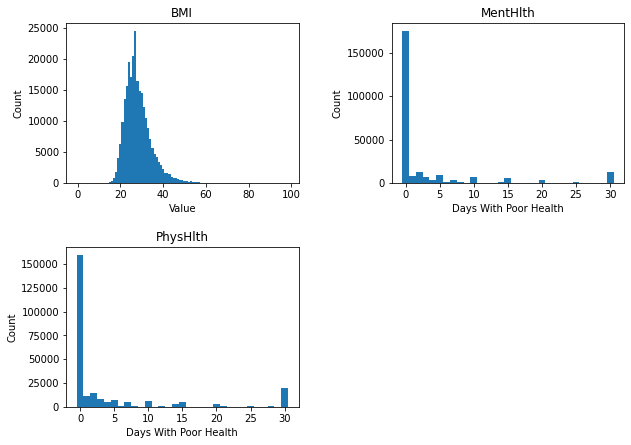

In [26]:
plt.subplots(figsize=(10,40))
plt.subplots_adjust(hspace=.4, wspace=.4)
for i, x in enumerate(num_data):
    plt.subplot(10, 2, i+1)
    plt.hist(num_data[x], bins=np.arange(max(num_data[x]) + 2) - .5)
    plt.title(x)
    plt.ylabel('Count')
    
    if x == 'BMI':
        plt.xlabel('Value')
    else:
        plt.xlabel('Days With Poor Health')

plt.savefig('num_data')

Here, we can see that the BMI values follows a pretty normal distribution, while almost all the values in the physical and mental health columns are zero. Because those two are so unbalanced the models might be very biased to the diabetes status of the outliers.

Min: 13.5	 Q1: 24.0	 Q2: 27.0	 Q3: 31.0	 Max: 41.5


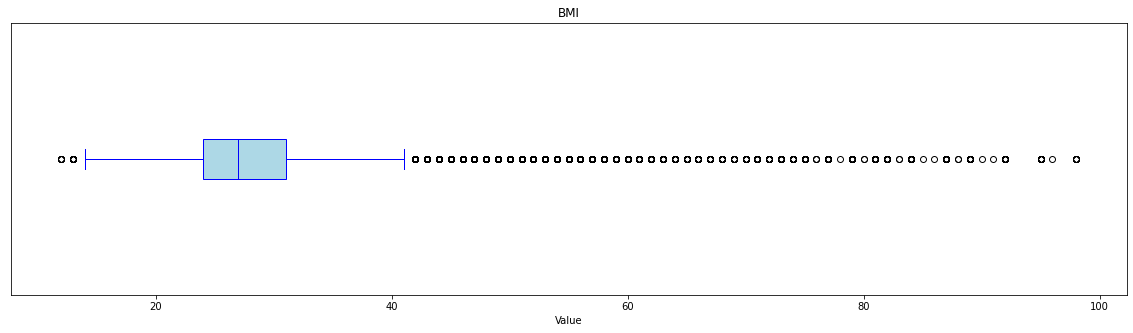

In [28]:
plt.figure(figsize=(20,5))

Q1 = data['BMI'].quantile(0.25)
Q2 = data['BMI'].quantile(0.50)
Q3 = data['BMI'].quantile(0.75)
IQR = Q3 - Q1

print(f'Min: {Q1 - 1.5*IQR}\t Q1: {Q1}\t Q2: {Q2}\t Q3: {Q3}\t Max: {Q3 + 1.5*IQR}')


bp = plt.boxplot(num_data['BMI'], vert=False, patch_artist=True)

for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(bp[element], color='blue')
for patch in bp['boxes']:
    patch.set(facecolor='lightblue')

plt.title('BMI')
plt.yticks([])
plt.xlabel('Value')

plt.show()

Here is another look at the distribution of the BMI where we can see that almost all the outliers range on the high end from around 40 to 100.

### Categorical Data

Creating bar graphs to display value counts and pie charts to display percentages.

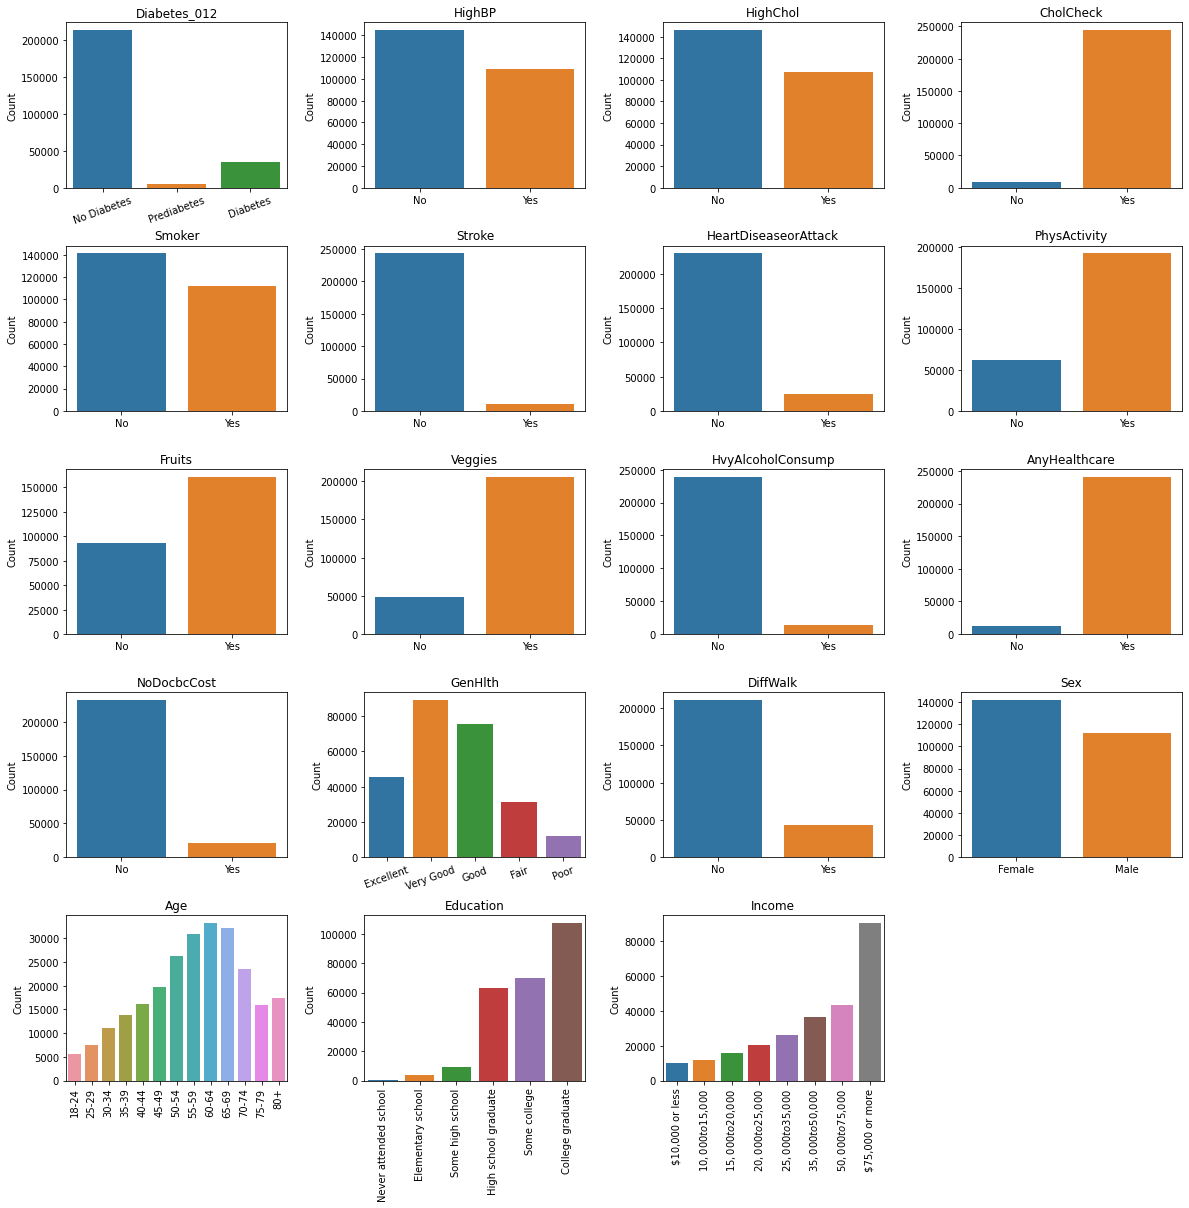

In [29]:
plt.subplots(figsize=(20,40))
plt.subplots_adjust(hspace=.35, wspace=.35)
for i, x in enumerate(cat_data):
    plt.subplot(10, 4, i+1)
    fig = sns.barplot(x=cat_data[x].value_counts(sort=False).index, y=cat_data[x].value_counts(sort=False))
    fig.set_title(x)
    plt.ylabel('Count')
    for label in cat_data[x].value_counts().index:
        if len(label) > 7:
            plt.xticks(rotation=20)
    if len(cat_data[x].value_counts().index) > 5:
        plt.xticks(rotation='vertical')

plt.savefig('cat_data_count')

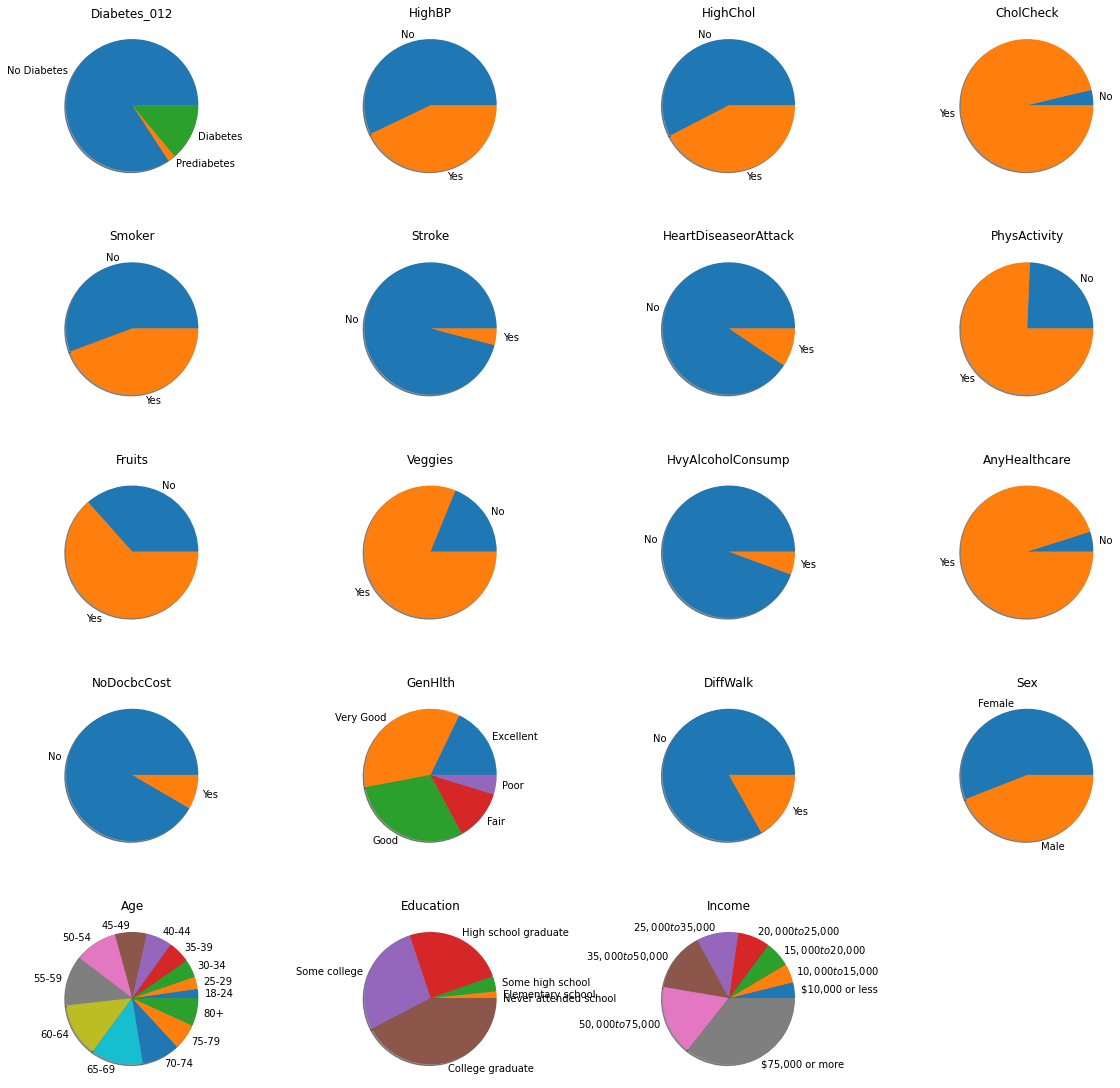

In [30]:
plt.subplots(figsize=(20,40))
plt.subplots_adjust(hspace=.35, wspace=.35)
for i, x in enumerate(cat_data):
    plt.subplot(10, 4, i+1)
    fig = plt.pie(cat_data[x].value_counts(sort=False), labels=cat_data[x].value_counts(sort=False).index, shadow=True)
    plt.title(x)

plt.savefig('cat_data_compare')

In these two displays, stroke, heavy alcohol consumption, no doctor because cost, and heart disease or attack are all heavily unbalanced towards "no",  while any healthcare and cholesterol check are heavily unbalanced towards "yes". Age, education, and income are all distributed around higher values.

### Correlation Heatmap

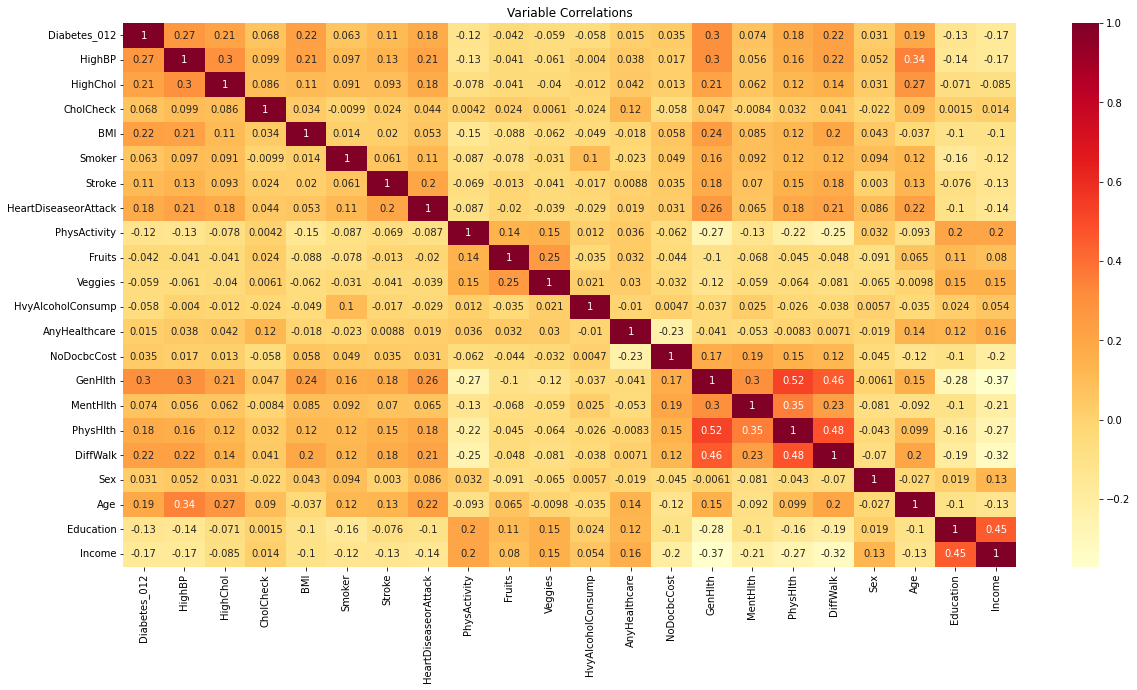

In [31]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), cmap='YlOrRd', annot=True)
plt.title('Variable Correlations')
plt.savefig('data_heatmap')

Biggest correlations:
 - General Health + Physical Health:  0.52
 - Physical Health + Difficulty Walking:  0.48
 - General Health + Difficulty Walking:  0.46
 - Education + Income:  0.45
 

Biggest correlations with having type 2 diabetes:
 - General Health:  0.30
 - High Blood Pressure:  0.27
 - Body Mass Index:  0.22
 - Difficulty Walking:  0.22
 - High Cholesterol:  0.21
 - Age:  0.19
 - Heart Disease or Attack:  0.18
 - Physical Health:  0.18
 
 

# Machine Learning

Splitting target and feature variables:

In [33]:
X = train.iloc[:, 1:] # pick out some for validation
y = train.Diabetes_binary

In [34]:
X_test = test.iloc[:, 1:]
y_test = test.Diabetes_binary

Defining useful functions to describe each model:

In [35]:
# Confusion matrix for visualizing prediction accuracy

def plot_cm(pred, test=y_test, title=''):
    
    cm = metrics.confusion_matrix(test, pred, normalize='true')

    text = np.array([['True Negative','False Positive'],['False Negative','True Positive']])
    labels = np.array([f'{i}\n{j:.2%}' for i, j in zip(text.flatten(), cm.flatten())]).reshape(2, 2)

    ax = sns.heatmap(cm, annot=labels, xticklabels=['Negative', 'Positive'],
                     yticklabels=['Negative', 'Positive'], cmap='Greens', cbar=False,
                     vmin=0, vmax=1, linewidth=1.2, linecolor='k', fmt='')
    ax.set(xlabel='Predicted', ylabel='Actual', title=title)
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    ax.plot()
    
    return


def describe_prediction(pred, test=y_test):
    print('TOTALS:')
    print(f'Predicted Positives:\t {len(pred[pred == 1]):,}')
    print(f'Predicted Negatives:\t {len(pred[pred == 0]):,}')
    print(f'Actual Positives:\t {len(test[test == 1]):,}')
    print(f'Actual Negatives:\t {len(test[test == 0]):,}')
    
    print()
    
    print('MODEL EVALUATION:')
    print(f'Accuracy:\t {metrics.accuracy_score(test, pred): .2%}')
    print(f'Precision:\t {metrics.precision_score(test, pred): .2%}')
    print(f'Sensitivity:\t {metrics.recall_score(test, pred): .2%}')
    print(f'Specificity:\t {metrics.recall_score(test, pred, pos_label=0): .2%}')
    print(f'F-score:\t {metrics.f1_score(test, pred): .2%}')
    
    print()
    
    return


def plot_feature_importance(importances, title=''):
    sns.barplot(x=importances, y=importances.index)
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title(title)
    return


Creating the models:

In [36]:
# lr = LogisticRegression(max_iter=1000).fit(X, y)
# dt = DecisionTreeClassifier().fit(X, y)
# rf = RandomForestClassifier().fit(X, y)
# xgb = XGBClassifier().fit(X, y)

All models are using default parameters, meaning they are not engineered for best results, but they will still offer useful information.

## 1. Logistic Regression

In [27]:
lr_pred = lr.predict(X_test)

In [28]:
describe_prediction(lr_pred)

TOTALS:
Predicted Positives:	 87,250
Predicted Negatives:	 166,430
Actual Positives:	 35,346
Actual Negatives:	 218,334

MODEL EVALUATION:
Accuracy:	  73.06%
Precision:	  31.09%
Sensitivity:	  76.75%
Specificity:	  72.46%
F-score:	  44.25%



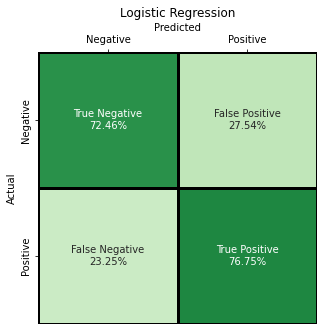

In [29]:
plt.figure(figsize=(5, 5))
plot_cm(lr_pred, title='Logistic Regression')

In [30]:
lr_feat_imp = pd.Series(lr.coef_[0], X.columns)
print(f'{"FEATURE:":<30} {"COEFFICIENTS:":<30} {"PERCENT INCREASE:"}')
for x, c in zip(lr_feat_imp.index, lr_feat_imp):
    print(f'{x:<30} {c:<30.4f} {exp(c) - 1:+.2%}')

FEATURE:                       COEFFICIENTS:                  PERCENT INCREASE:
HighBP                         0.7350                         +108.56%
HighChol                       0.5874                         +79.93%
CholCheck                      1.3537                         +287.16%
BMI                            0.0756                         +7.86%
Smoker                         -0.0014                        -0.14%
Stroke                         0.1615                         +17.53%
HeartDiseaseorAttack           0.2535                         +28.85%
PhysActivity                   -0.0328                        -3.23%
Fruits                         -0.0346                        -3.40%
Veggies                        -0.0616                        -5.97%
HvyAlcoholConsump              -0.7497                        -52.75%
AnyHealthcare                  0.0634                         +6.55%
NoDocbcCost                    0.0163                         +1.64%
GenHlth        

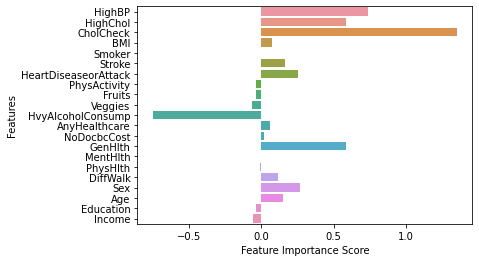

In [31]:
plot_feature_importance(lr_feat_imp)

In [32]:
print(metrics.classification_report(y_test, lr_pred))
print(metrics.zero_one_loss(y_test, lr_pred))
print(metrics.log_loss(y_test, lr.predict_proba(X_test)))


              precision    recall  f1-score   support

         0.0       0.95      0.72      0.82    218334
         1.0       0.31      0.77      0.44     35346

    accuracy                           0.73    253680
   macro avg       0.63      0.75      0.63    253680
weighted avg       0.86      0.73      0.77    253680

0.26940239672027755
0.5296937438254601


## 2. Decision Tree

In [37]:
import graphviz

dt = DecisionTreeClassifier().fit(X, y)
dt_pred = dt.predict(X_test)
tree_dot = tree.export_graphviz(
    dt
)

In [38]:
describe_prediction(dt_pred)

TOTALS:
Predicted Positives:	 96,855
Predicted Negatives:	 156,825
Actual Positives:	 35,346
Actual Negatives:	 218,334

MODEL EVALUATION:
Accuracy:	  75.44%
Precision:	  36.08%
Sensitivity:	  98.88%
Specificity:	  71.65%
F-score:	  52.87%



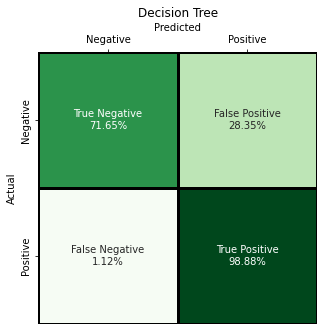

In [39]:
plt.figure(figsize=(5, 5))
plot_cm(dt_pred, title='Decision Tree')

In [40]:
dt_feat_imp = pd.Series(dt.feature_importances_, X.columns)
print(f'{"FEATURE:":<30} {"IMPORTANCE:":<30}')
for x, c in zip(dt_feat_imp.index, dt_feat_imp):
    print(f'{x:<30} {c:<30.2%}')

FEATURE:                       IMPORTANCE:                   
HighBP                         14.75%                        
HighChol                       2.04%                         
CholCheck                      0.57%                         
BMI                            12.82%                        
Smoker                         3.04%                         
Stroke                         1.08%                         
HeartDiseaseorAttack           1.75%                         
PhysActivity                   2.76%                         
Fruits                         3.31%                         
Veggies                        2.48%                         
HvyAlcoholConsump              0.93%                         
AnyHealthcare                  0.77%                         
NoDocbcCost                    1.26%                         
GenHlth                        10.06%                        
MentHlth                       5.59%                         
PhysHlth

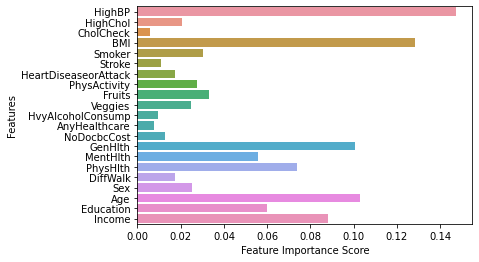

In [41]:
plot_feature_importance(dt_feat_imp)

In [44]:
from sklearn import tree
text_representation = tree.plot_tree('decision_tree')
print(text_representation)

TypeError: decision_tree is not an estimator instance.

## 3. Random Forest

In [38]:
rf_pred = rf.predict(X_test)

In [39]:
describe_prediction(rf_pred)

TOTALS:
Predicted Positives:	 91,021
Predicted Negatives:	 162,659
Actual Positives:	 35,346
Actual Negatives:	 218,334

MODEL EVALUATION:
Accuracy:	  77.84%
Precision:	  38.54%
Sensitivity:	  99.23%
Specificity:	  74.38%
F-score:	  55.51%



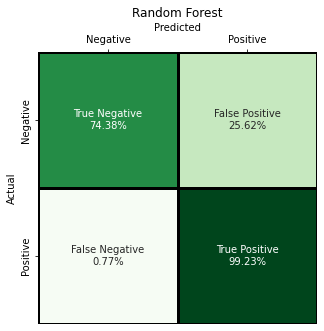

In [40]:
plt.figure(figsize=(5, 5))
plot_cm(rf_pred, title='Random Forest')

In [41]:
rf_feat_imp = pd.Series(rf.feature_importances_, X.columns)
print(f'{"FEATURE:":<30} {"IMPORTANCE:":<30}')
for x, c in zip(rf_feat_imp.index, rf_feat_imp):
    print(f'{x:<30} {c:<30.2%}')

FEATURE:                       IMPORTANCE:                   
HighBP                         8.25%                         
HighChol                       4.15%                         
CholCheck                      0.62%                         
BMI                            16.80%                        
Smoker                         2.87%                         
Stroke                         0.98%                         
HeartDiseaseorAttack           1.92%                         
PhysActivity                   2.27%                         
Fruits                         2.85%                         
Veggies                        2.18%                         
HvyAlcoholConsump              0.92%                         
AnyHealthcare                  0.75%                         
NoDocbcCost                    1.19%                         
GenHlth                        10.45%                        
MentHlth                       5.21%                         
PhysHlth

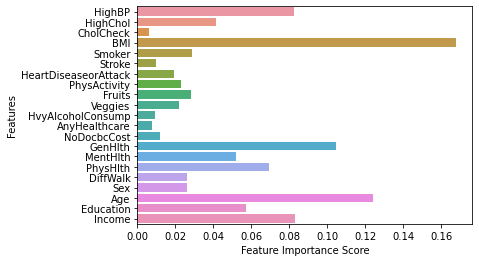

In [42]:
plot_feature_importance(rf_feat_imp)

FEATURE:                       COEFFICIENTS:                  PERCENT INCREASE:
HighBP                         0.1211                         +12.87%
BMI                            0.3274                         +38.74%
Age                            0.2054                         +22.80%
HighChol                       0.0554                         +5.70%
PhysActivity                   0.0257                         +2.61%
GenHlth                        0.1774                         +19.42%
Fruits                         0.0314                         +3.19%
Veggies                        0.0266                         +2.69%
Smoker                         0.0295                         +2.99%

## 4. XGBoost

In [43]:
xgb_pred = xgb.predict(X_test)

In [44]:
describe_prediction(xgb_pred)

TOTALS:
Predicted Positives:	 92,666
Predicted Negatives:	 161,014
Actual Positives:	 35,346
Actual Negatives:	 218,334

MODEL EVALUATION:
Accuracy:	  72.57%
Precision:	  31.52%
Sensitivity:	  82.63%
Specificity:	  70.94%
F-score:	  45.63%



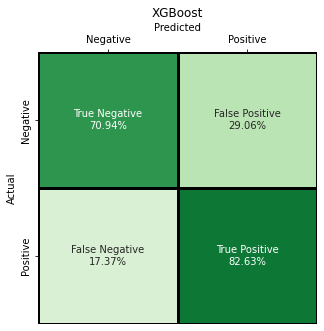

In [45]:
plt.figure(figsize=(5, 5))
plot_cm(xgb_pred, title='XGBoost')

In [46]:
xgb_feat_imp = pd.Series(xgb.feature_importances_, X.columns)
print(f'{"FEATURE:":<30} {"IMPORTANCE:":<30}')
for x, c in zip(xgb_feat_imp.index, xgb_feat_imp):
    print(f'{x:<30} {c:<30.2%}')

FEATURE:                       IMPORTANCE:                   
HighBP                         51.66%                        
HighChol                       6.47%                         
CholCheck                      4.18%                         
BMI                            2.35%                         
Smoker                         0.80%                         
Stroke                         1.14%                         
HeartDiseaseorAttack           2.56%                         
PhysActivity                   0.78%                         
Fruits                         0.77%                         
Veggies                        0.85%                         
HvyAlcoholConsump              3.41%                         
AnyHealthcare                  0.74%                         
NoDocbcCost                    0.85%                         
GenHlth                        12.70%                        
MentHlth                       0.80%                         
PhysHlth

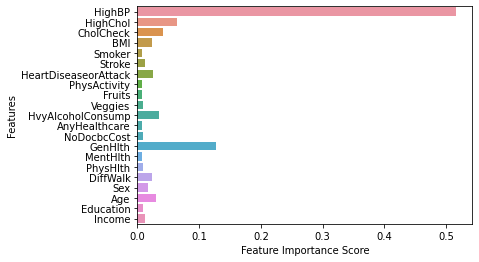

In [47]:
plot_feature_importance(xgb_feat_imp)

## ML Summary

In [48]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Extreme Gradient Boost']
model_preds = [lr_pred, dt_pred, rf_pred, xgb_pred]

model_results = pd.DataFrame.from_dict({
    'Model': models,
    'Accuracy': [f'{metrics.accuracy_score(y_test, pred): .2%}' for pred in model_preds],
    'Precision': [f'{metrics.precision_score(y_test, pred): .2%}' for pred in model_preds],
    'Sensitivity': [f'{metrics.recall_score(y_test, pred): .2%}' for pred in model_preds],
    'Specificity': [f'{metrics.recall_score(y_test, pred, pos_label=0): .2%}' for pred in model_preds],
    'F-score': [f'{metrics.f1_score(y_test, pred): .2%}' for pred in model_preds],
}).set_index('Model')

model_results

,Accuracy,Precision,Sensitivity,Specificity,F-score
Model,,,,,
Logistic Regression,73.06%,31.09%,76.75%,72.46%,44.25%
Decision Tree,75.47%,36.11%,98.88%,71.68%,52.90%
Random Forest,77.84%,38.54%,99.23%,74.38%,55.51%
Extreme Gradient Boost,72.57%,31.52%,82.63%,70.94%,45.63%


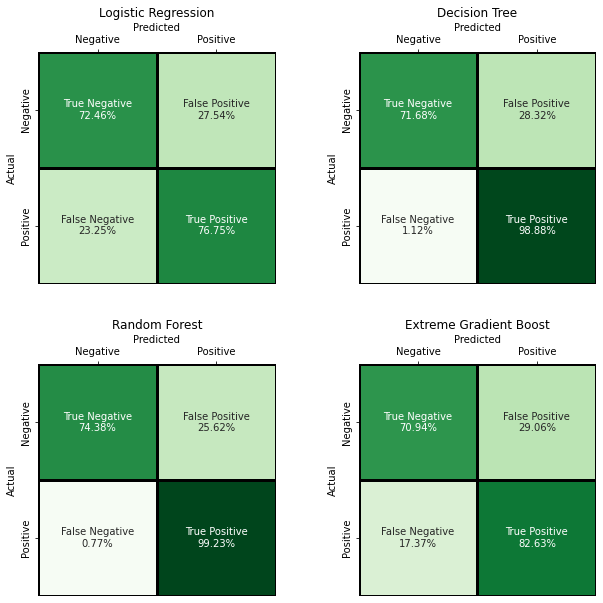

In [49]:
plt.subplots(figsize=(10, 10))
plt.subplots_adjust(wspace=.35, hspace=.35)

plt.subplot(2, 2, 1)
plot_cm(lr_pred, title='Logistic Regression')

plt.subplot(2, 2, 2)
plot_cm(dt_pred, title='Decision Tree')

plt.subplot(2, 2, 3)
plot_cm(rf_pred, title='Random Forest')

plt.subplot(2, 2, 4)
plot_cm(xgb_pred, title='Extreme Gradient Boost')

plt.savefig('confusion_matrices')

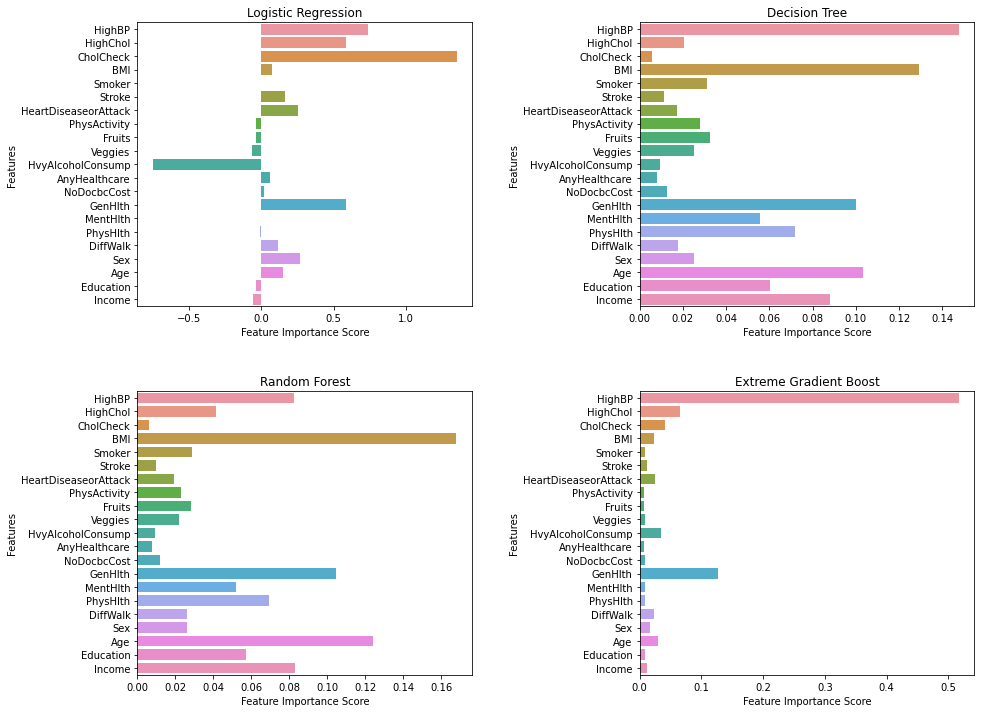

In [50]:
plt.subplots(figsize=(15, 12))
plt.subplots_adjust(wspace=.5, hspace=.3)

plt.subplot(2, 2, 1)
plot_feature_importance(lr_feat_imp, title='Logistic Regression')

plt.subplot(2, 2, 2)
plot_feature_importance(dt_feat_imp, title='Decision Tree')

plt.subplot(2, 2, 3)
plot_feature_importance(rf_feat_imp, title='Random Forest')

plt.subplot(2, 2, 4)
plot_feature_importance(xgb_feat_imp, title='Extreme Gradient Boost')

plt.savefig('feature_importances')

In [51]:
fs = SelectKBest(chi2, k=5)
fit = fs.fit(X, y)

columns = X.iloc[:, fs.get_support(indices=True)].columns

print('Top 5 features:')
for col in columns:
    print(' * ' + col)


Top 5 features:
 * BMI
 * GenHlth
 * MentHlth
 * PhysHlth
 * Age


Feature selection offers another perspective on the top features by taking a look at the features used in the selected data. Further exploration would include using the feature selection data to create better models and find out more about the feature importances. It would also be good to go more in-depth into voting classifiers to find out how well the data works in unknown environments.

In [52]:
voting_clf = VotingClassifier(estimators = [('lr', lr),
                                            ('dt', dt),
                                            ('rf', rf),
                                            ('xgb', xgb)], 
                              voting = 'soft')


cv = cross_val_score(voting_clf, X, y)

cv

array([0.72048943, 0.72699625, 0.72867449, 0.73164521, 0.72931108])

In [53]:
print(sum(cv)/len(cv))

0.727423292040205


Further exploration into how individual features affect the models:

HighBP


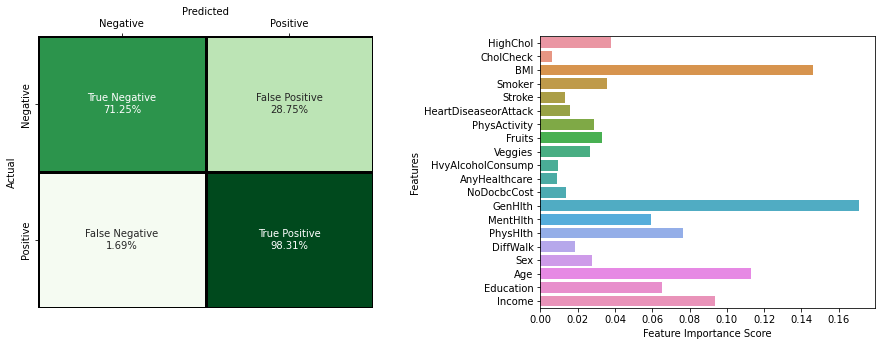

HighChol


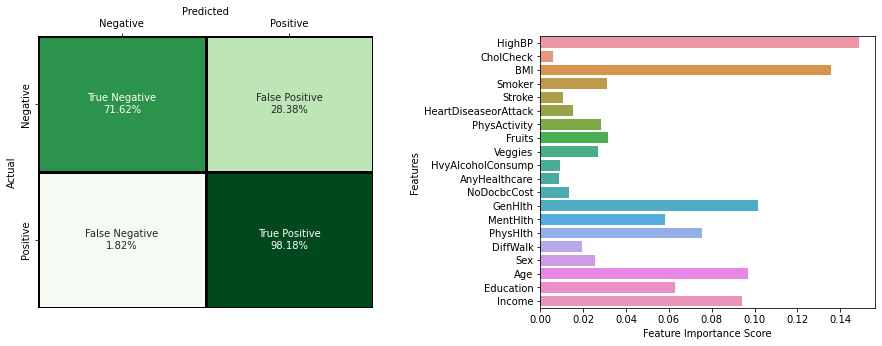

CholCheck


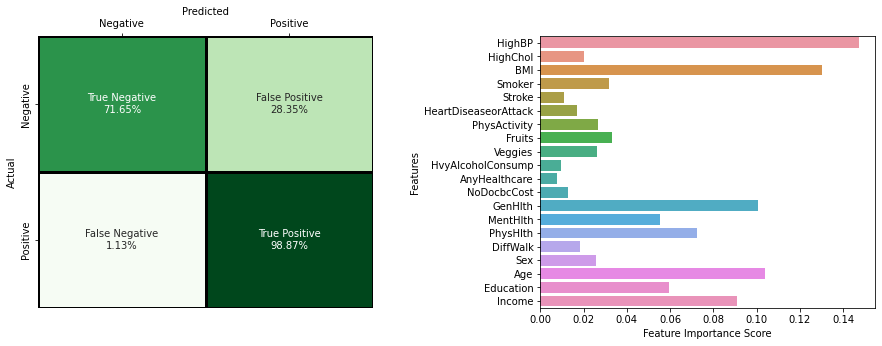

BMI


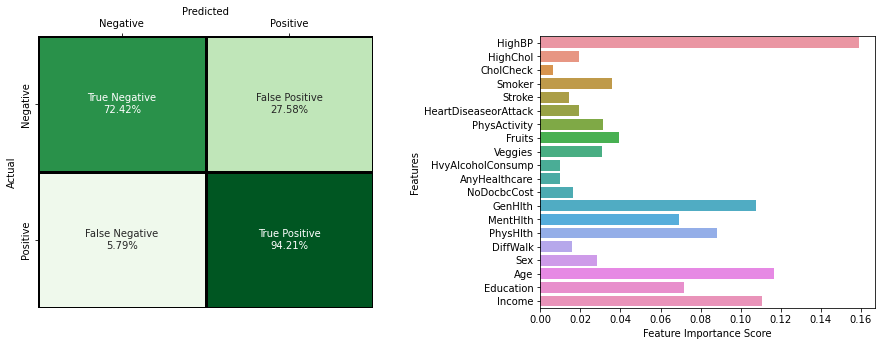

Smoker


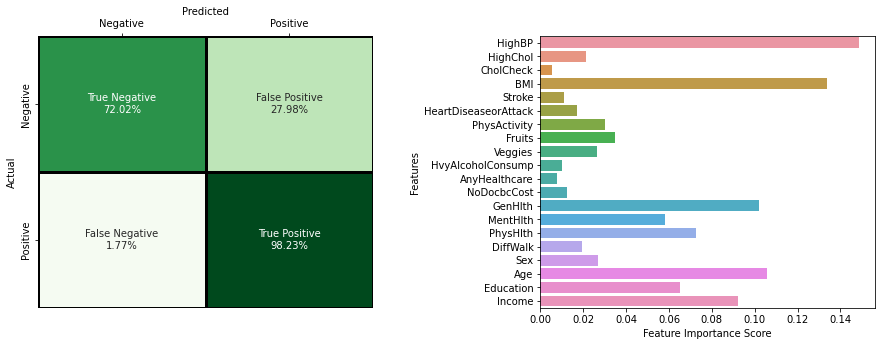

Stroke


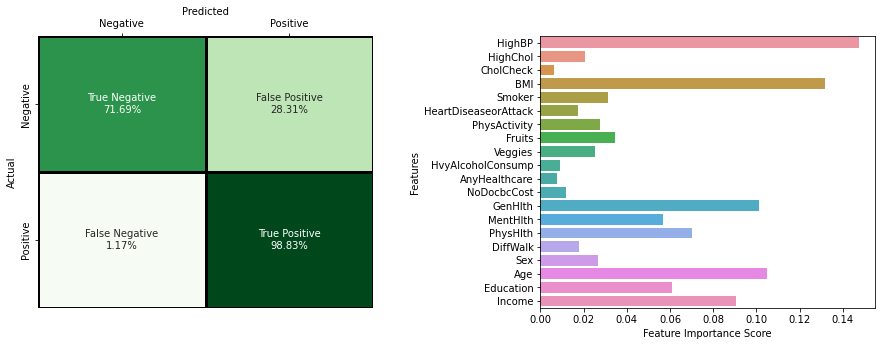

HeartDiseaseorAttack


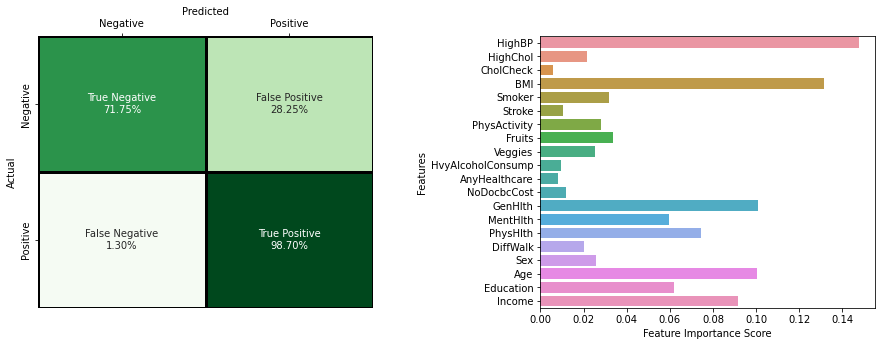

PhysActivity


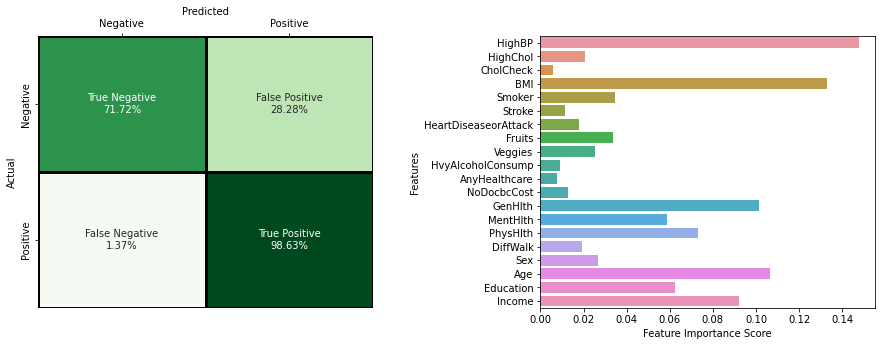

Fruits


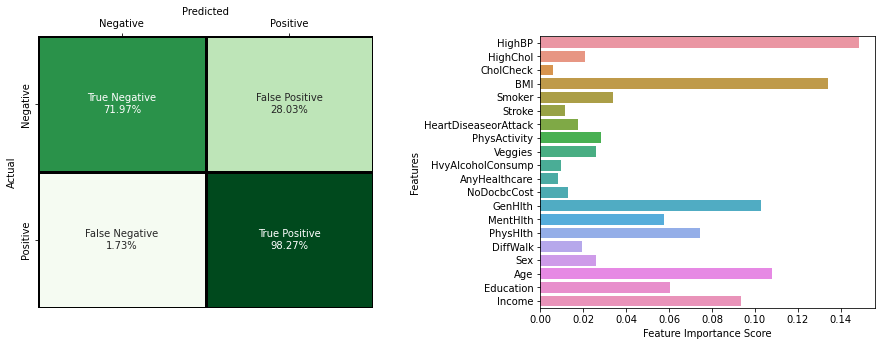

Veggies


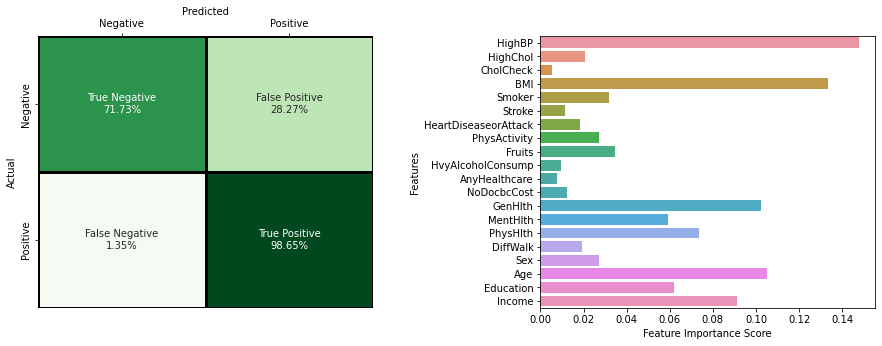

HvyAlcoholConsump


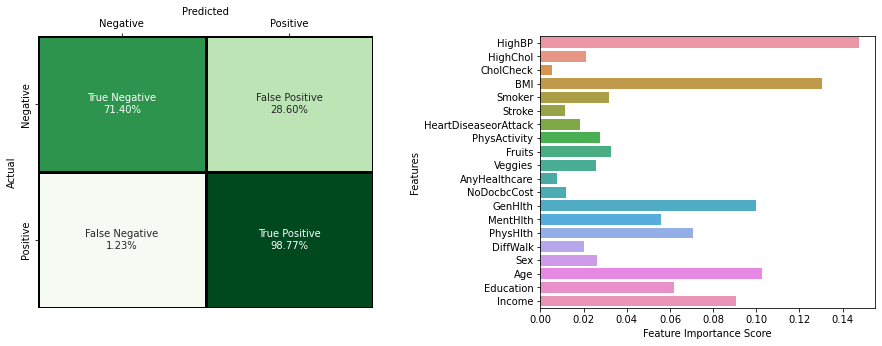

AnyHealthcare


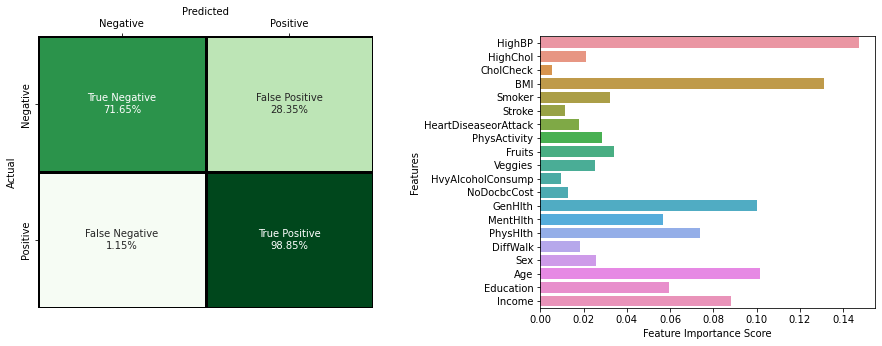

NoDocbcCost


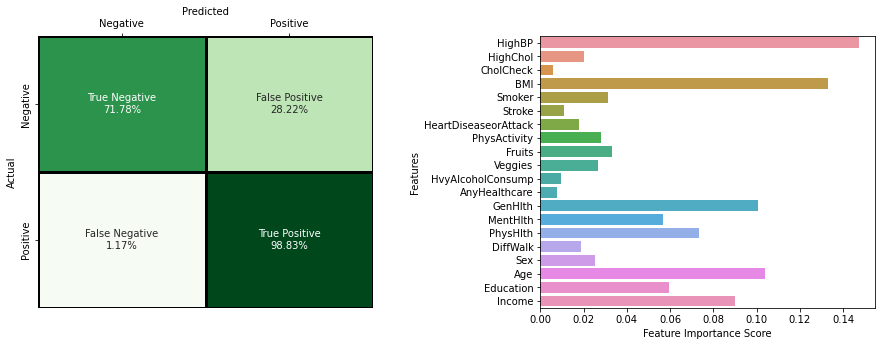

GenHlth


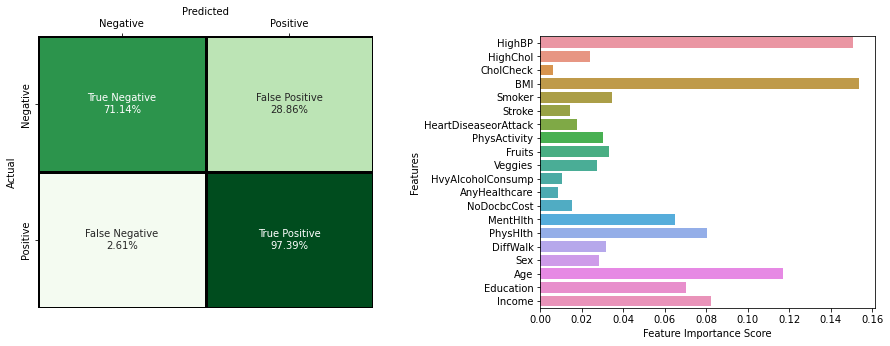

MentHlth


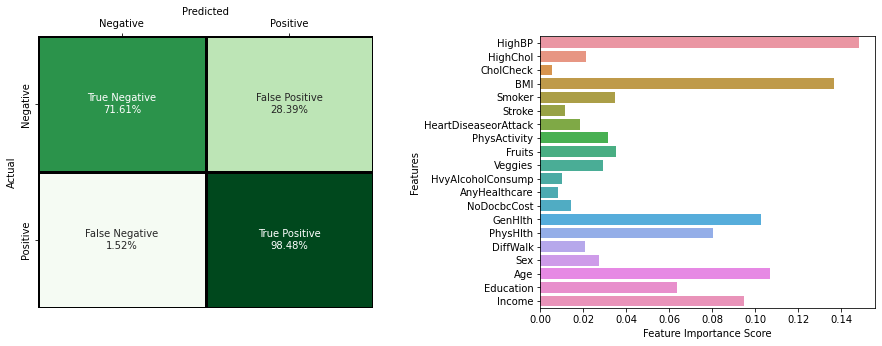

PhysHlth


In [ ]:
# WARNING: THE FOLLOWING CELLS TAKE A LONG TIME TO RUN

for i in range(21):
    print(X.columns[i])
    X2 = X.drop(X.columns[i], axis=1)
    X2_test = X_test.drop(X_test.columns[i], axis=1)
    dt = DecisionTreeClassifier().fit(X2, y)
    dt_pred = dt.predict(X2_test)
    dt_feat_imp = pd.Series(dt.feature_importances_, X2.columns)
    plt.subplots(figsize=(15,5))
    plt.subplots_adjust(wspace=.5, hspace=.3)
    plt.subplot(1,2,1)
    plot_cm(dt_pred)
    plt.subplot(1,2,2)
    plot_feature_importance(dt_feat_imp)
    plt.show()

In [ ]:
for i in range(21):
    print(X.columns[i])
    X2 = X[[X.columns[i]]]
    X2_test = X_test[[X_test.columns[i]]]
    dt = DecisionTreeClassifier().fit(X2, y)
    dt_pred = dt.predict(X2_test)
    dt_feat_imp = pd.Series(dt.feature_importances_, X2.columns)
    plt.figure(figsize=(5,5))
    plot_cm(dt_pred)
    plt.show()